In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.patches as mpatches

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
from scipy import stats

In [6]:
import seaborn as sns; sns.set_theme(color_codes=True)

In [7]:
import os

In [8]:
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.metrics
import sklearn.datasets

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [193]:
GM12878_TADs = pd.read_csv("Carter Lab Datasets/TAD Data/GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt", delimiter = "\t")
GM12878_TADs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5
0,1,144835000,145835000,1,144835000,145835000,"255,255,0",0.55170,0.350090,0.268600,0.43080,0.53910
1,1,68985000,70260000,1,68985000,70260000,"255,255,0",0.34374,0.270840,0.295710,0.40022,0.50935
2,1,49365000,50810000,1,49365000,50810000,"255,255,0",1.05670,0.240080,0.241480,0.49497,0.68434
3,1,163360000,164895000,1,163360000,164895000,"255,255,0",1.15700,0.219040,0.243360,0.71738,0.60165
4,1,247800000,248395000,1,247800000,248395000,"255,255,0",0.33524,0.183090,0.273430,0.40819,0.40678
...,...,...,...,...,...,...,...,...,...,...,...,...
9269,X,133940000,134045000,X,133940000,134045000,"255,255,0",0.82134,0.017177,0.019672,0.53636,0.55455
9270,X,24080000,24165000,X,24080000,24165000,"255,255,0",0.92837,0.022191,0.012027,0.65278,0.51389
9271,X,128865000,128960000,X,128865000,128960000,"255,255,0",0.97871,0.010819,0.021867,0.56667,0.67778
9272,X,13780000,13880000,X,13780000,13880000,"255,255,0",0.81775,0.014339,0.012749,0.55000,0.63000


In [10]:
common_TADs = pd.read_csv("Carter Lab Datasets/common_TADs.csv")
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,distances
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,0.078941,0.94881,0.92310,20000.000000
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,0.075969,0.96371,0.91040,5000.000000
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,0.061728,0.84343,0.75692,30000.000000
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,0.082510,0.87974,0.74316,25000.000000
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,0.049931,0.87857,0.92143,30413.812651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,0.037638,0.66429,0.83095,11180.339887
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,0.041631,0.76800,0.82240,7071.067812
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,0.036562,0.69384,0.68659,15000.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,0.020443,0.77083,0.72917,5000.000000


In [11]:
H3K36me3 = pd.read_csv("Carter Lab Datasets/GM12878_H3K36me3.bed", sep='\t', comment='t', header=None)
header = ["chr", "start", "end", "peak", "col5", "col6", "col7", "col8", "col9", "col10"]
H3K36me3.columns = header[:len(H3K36me3.columns)]
H3K36me3

,chr,start,end,peak,col5,col6,col7,col8,col9,col10
0,chr1,100060425,100060731,Peak_3704,97,.,7.23782,9.73964,5.53821,100
1,chr1,100063347,100063515,Peak_9365,79,.,5.91090,7.99793,4.29534,94
2,chr1,100063669,100063983,Peak_46352,49,.,4.02884,4.98931,2.16069,43
3,chr1,100064747,100065027,Peak_46353,49,.,4.26410,4.98931,2.16069,216
4,chr1,100067829,100068244,Peak_23302,63,.,5.46039,6.36215,3.15445,206
...,...,...,...,...,...,...,...,...,...,...
72561,chrX,85326578,85326748,Peak_38019,57,.,4.92674,5.78009,2.80989,83
72562,chrX,9503321,9503578,Peak_116469,32,.,3.32308,3.22608,0.95339,56
72563,chrX,9653516,9653844,Peak_116470,32,.,3.32308,3.22608,0.95339,205
72564,chrX,9688927,9689079,Peak_87025,40,.,3.55833,4.07966,1.54540,22


In [12]:
H3K9me3 = pd.read_csv("Carter Lab Datasets/GM12878_H3K9me3.bed", sep='\t', comment='t', header=None)
header = ["chr", "start", "end", "peak", "col5", "col6", "col7", "col8", "col9", "col10"]
H3K9me3.columns = header[:len(H3K9me3.columns)]

H3K9me3

,chr,start,end,peak,col5,col6,col7,col8,col9,col10
0,chr1,100003902,100004057,Peak_15064,45,.,4.14253,4.53017,1.34113,106
1,chr1,100004243,100004615,Peak_23382,40,.,3.62047,4.07966,1.09677,261
2,chr1,100005110,100005273,Peak_45127,28,.,2.78357,2.82695,0.30076,82
3,chr1,100005890,100006025,Peak_36408,32,.,3.43691,3.22608,0.55948,72
4,chr1,100044018,100044356,Peak_36409,32,.,3.43691,3.22608,0.55948,241
...,...,...,...,...,...,...,...,...,...,...
31448,chrX,97530866,97531044,Peak_3562,72,.,5.59291,7.28687,3.41807,66
31449,chrX,983999,984331,Peak_18989,45,.,3.90880,4.53017,1.34113,100
31450,chrX,991133,991400,Peak_18990,45,.,3.90880,4.53017,1.34113,17
31451,chrX,992450,992677,Peak_34165,35,.,3.67508,3.50220,0.65538,132


In [13]:
H3K4me1 = pd.read_csv("Carter Lab Datasets/GM12878_H3K4me1.bed", sep='\t', comment='t', header=None)
H3K4me1.columns = header[:len(H3K4me1.columns)]


H3K4me2 = pd.read_csv("Carter Lab Datasets/GM12878_H3K4me2.bed", sep='\t', comment='t', header=None)
H3K4me2.columns = header[:len(H3K4me2.columns)]

H3K4me3 = pd.read_csv("Carter Lab Datasets/GM12878_H3K4me3.bed", sep='\t', comment='t', header=None)
H3K4me3.columns = header[:len(H3K4me3.columns)]

H3K27me3 = pd.read_csv("Carter Lab Datasets/GM12878_H3K27me3.bed", sep='\t', comment='t', header=None)
H3K27me3.columns = header[:len(H3K27me3.columns)]

H4K20me1 = pd.read_csv("Carter Lab Datasets/GM12878_H4K20me1.bed", sep='\t', comment='t', header=None)
H4K20me1.columns = header[:len(H4K20me1.columns)]


In [14]:
def mean_histone_tad_overlap(histone_data, tad_start, tad_end, tad_len, start_pos_1, end_pos_1):
    cond1 = histone_data[(start_pos_1 >= tad_start) & (end_pos_1 <= tad_end)]
    cond1["overlap"] = (cond1["end"] - cond1["start"]) / tad_len
    cond2 = histone_data[(start_pos_1 < tad_start) & ((end_pos_1 >= tad_start) & (end_pos_1 <= tad_end))]
    cond2["overlap"] = (cond2["end"] - cond2["start"]) / tad_len
    cond3 = histone_data[((start_pos_1 >= tad_start) & (start_pos_1 <= tad_end)) & (end_pos_1 >= tad_end)]
    cond3["overlap"] = (cond3["end"] - cond3["start"]) / tad_len
    cond4 = histone_data[(start_pos_1 < tad_start) & (end_pos_1 > tad_end)]
    cond4["overlap"] = 1.0
    overlap_lst = []
    overlap_lst.extend(cond1["overlap"].tolist())
    overlap_lst.extend(cond2["overlap"].tolist())
    overlap_lst.extend(cond3["overlap"].tolist())
    overlap_lst.extend(cond4["overlap"].tolist())
    norm = np.linalg.norm(overlap_lst)
    norm_lst = np.array(overlap_lst) / norm
    mean = np.mean(norm_lst)
    return mean

In [15]:
enrichment_matrix = np.zeros((1100, 7))
for i, row in common_TADs.iterrows():
    H3K36me3_chr = H3K36me3[H3K36me3["chr"] == "chr" + str(row["chr1"])] #active
    H3K9me3_chr = H3K9me3[H3K9me3["chr"] == "chr" + str(row["chr1"])] #inactive
    H3K4me1_chr = H3K4me1[H3K4me1["chr"] == "chr" + str(row["chr1"])] #active
    H3K4me2_chr = H3K4me2[H3K4me2["chr"] == "chr" + str(row["chr1"])] #active
    H3K4me3_chr = H3K4me3[H3K4me3["chr"] == "chr" + str(row["chr1"])] #active
    H3K27me3_chr = H3K27me3[H3K27me3["chr"] == "chr" + str(row["chr1"])] #inactive
    H4K20me1_chr = H4K20me1[H4K20me1["chr"] == "chr" + str(row["chr1"])] #active
    tad_start = row["x1"]
    tad_end = row["x2"]
    tad_len = (abs(row["x2"]-row["x1"]))
    start_pos_1 = H3K36me3_chr["start"]
    end_pos_1 = H3K36me3_chr["end"]
    start_pos_2 = H3K9me3_chr["start"]
    end_pos_2 = H3K9me3_chr["end"]
    start_pos_3 = H3K4me1_chr["start"]
    end_pos_3 = H3K4me1_chr["end"]
    start_pos_4 = H3K4me2_chr["start"]
    end_pos_4 = H3K4me2_chr["end"]
    start_pos_5 = H3K4me3_chr["start"]
    end_pos_5 = H3K4me3_chr["end"]
    start_pos_6 = H3K27me3_chr["start"]
    end_pos_6 = H3K27me3_chr["end"]
    start_pos_7 = H4K20me1_chr["start"]
    end_pos_7 = H4K20me1_chr["end"]
    enrichment_matrix[i][0] = mean_histone_tad_overlap(H3K36me3_chr, tad_start, tad_end, tad_len, start_pos_1, end_pos_1)
    enrichment_matrix[i][1] = mean_histone_tad_overlap(H3K9me3_chr, tad_start, tad_end, tad_len, start_pos_2, end_pos_2)
    enrichment_matrix[i][2] = mean_histone_tad_overlap(H3K4me1_chr, tad_start, tad_end, tad_len, start_pos_3, end_pos_3)
    enrichment_matrix[i][3] = mean_histone_tad_overlap(H3K4me2_chr, tad_start, tad_end, tad_len, start_pos_4, end_pos_4)
    enrichment_matrix[i][4] = mean_histone_tad_overlap(H3K4me3_chr, tad_start, tad_end, tad_len, start_pos_5, end_pos_5)
    enrichment_matrix[i][5] = mean_histone_tad_overlap(H3K27me3_chr, tad_start, tad_end, tad_len, start_pos_6, end_pos_6)
    enrichment_matrix[i][6] = mean_histone_tad_overlap(H4K20me1_chr, tad_start, tad_end, tad_len, start_pos_7, end_pos_7)
    


In [16]:
enrichment_matrix = np.nan_to_num(enrichment_matrix)
enrichment_matrix

array([[0.08540854, 0.32692021, 0.13318798, ..., 0.15772155, 0.16762227,
        0.70530356],
       [0.16089141, 0.35141531, 0.11160896, ..., 0.13940404, 0.22606457,
        0.36900084],
       [0.        , 0.        , 0.17281381, ..., 0.70681674, 0.27508538,
        0.        ],
       ...,
       [0.        , 0.        , 0.38397726, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18167907, 0.6944886 , 0.20440145, ..., 0.29062763, 0.        ,
        0.70649838]])

In [17]:
enrichment_matrix.shape

(1100, 7)

In [18]:
H3K36me3_enrichment = enrichment_matrix[:, 0]
H3K9me3_enrichment = enrichment_matrix[:, 1]
H3K4me1_enrichment = enrichment_matrix[:, 2]
H3K4me2_enrichment = enrichment_matrix[:, 3]
H3K4me3_enrichment = enrichment_matrix[:, 4]
H3K27me3_enrichment = enrichment_matrix[:, 5]
H4K20me1_enrichment = enrichment_matrix[:, 6]
H3K9me3_enrichment

array([0.32692021, 0.35141531, 0.        , ..., 0.        , 1.        ,
       0.6944886 ])

In [19]:
common_TADs["H3K36me3"] = H3K36me3_enrichment
common_TADs["H3K9me3"] = H3K9me3_enrichment
common_TADs["H3K4me1"] = H3K4me1_enrichment
common_TADs["H3K4me2"] = H3K4me2_enrichment
common_TADs["H3K4me3"] = H3K4me3_enrichment
common_TADs["H3K27me3"] = H3K27me3_enrichment
common_TADs["H4K20me1"] = H4K20me1_enrichment
common_TADs = common_TADs.drop(["distances"], axis = 1)
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,H3K36me3,H3K9me3,H3K4me1,H3K4me2,H3K4me3,H3K27me3,H4K20me1
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,0.078941,0.94881,0.92310,0.085409,0.326920,0.133188,0.122681,0.157722,0.167622,0.705304
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,0.075969,0.96371,0.91040,0.160891,0.351415,0.111609,0.096320,0.139404,0.226065,0.369001
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,0.061728,0.84343,0.75692,0.000000,0.000000,0.172814,0.253319,0.706817,0.275085,0.000000
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,0.082510,0.87974,0.74316,0.000000,0.000000,0.501726,0.312852,0.694064,0.244738,0.000000
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,0.049931,0.87857,0.92143,0.372169,0.000000,0.270819,0.167466,0.241590,0.499037,0.704529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,0.037638,0.66429,0.83095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,0.041631,0.76800,0.82240,0.000000,0.000000,0.311403,0.317256,0.570525,1.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,0.036562,0.69384,0.68659,0.000000,0.000000,0.383977,0.523487,0.000000,0.000000,1.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,0.020443,0.77083,0.72917,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(enrichment_matrix)

KMeans(n_clusters=2)

In [42]:
labels = kmeans.predict(enrichment_matrix)
print(labels)

[1 0 0 ... 1 0 1]


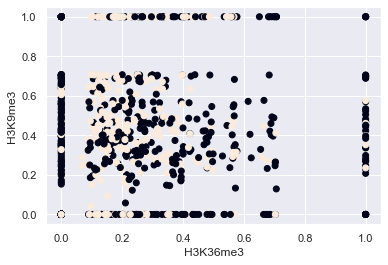

In [43]:
plt.scatter(enrichment_matrix[:, 0], enrichment_matrix[:, 1], c = labels)
plt.xlabel('H3K36me3')
plt.ylabel('H3K9me3')
plt.show()

In [44]:
common_TADs["KMeans_Label"] = labels
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,f5,H3K36me3,H3K9me3,H3K4me1,H3K4me2,H3K4me3,H3K27me3,H4K20me1,KMeans_Label,Label
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.92310,0.085409,0.326920,0.133188,0.122681,0.157722,0.167622,0.705304,1,1
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.91040,0.160891,0.351415,0.111609,0.096320,0.139404,0.226065,0.369001,0,1
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.75692,0.000000,0.000000,0.172814,0.253319,0.706817,0.275085,0.000000,0,0
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.74316,0.000000,0.000000,0.501726,0.312852,0.694064,0.244738,0.000000,0,0
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.92143,0.372169,0.000000,0.270819,0.167466,0.241590,0.499037,0.704529,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.83095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,0.82240,0.000000,0.000000,0.311403,0.317256,0.570525,1.000000,0.000000,0,0
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.68659,0.000000,0.000000,0.383977,0.523487,0.000000,0.000000,1.000000,1,1
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.72917,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0


In [24]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering().fit(enrichment_matrix)

In [25]:
labels2 = hierarchical.labels_
print(labels2)

[1 1 0 ... 1 0 1]


In [26]:
common_TADs["Label"] = labels2
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,f5,H3K36me3,H3K9me3,H3K4me1,H3K4me2,H3K4me3,H3K27me3,H4K20me1,KMeans_Label,Label
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.92310,0.085409,0.326920,0.133188,0.122681,0.157722,0.167622,0.705304,0,1
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.91040,0.160891,0.351415,0.111609,0.096320,0.139404,0.226065,0.369001,1,1
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.75692,0.000000,0.000000,0.172814,0.253319,0.706817,0.275085,0.000000,1,0
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.74316,0.000000,0.000000,0.501726,0.312852,0.694064,0.244738,0.000000,1,0
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.92143,0.372169,0.000000,0.270819,0.167466,0.241590,0.499037,0.704529,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.83095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,0.82240,0.000000,0.000000,0.311403,0.317256,0.570525,1.000000,0.000000,1,0
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.68659,0.000000,0.000000,0.383977,0.523487,0.000000,0.000000,1.000000,0,1
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.72917,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0


In [45]:
print(len(common_TADs[common_TADs["Label"] == 1]))
print(len(common_TADs[common_TADs["Label"] == 0]))

374
726


In [46]:
percent_common_labels = ((len(common_TADs[common_TADs["Label"] == common_TADs["KMeans_Label"]]))/(1100))*100
percent_common_labels

96.18181818181817

In [61]:
nonzero_histone = common_TADs[(common_TADs["H3K36me3"] != 0 ) | (common_TADs["H3K9me3"] != 0) | (common_TADs["H3K9me3"] != 0) | (common_TADs["H3K4me1"] != 0) | (common_TADs["H3K4me2"] != 0) | (common_TADs["H3K4me3"] != 0) | (common_TADs["H3K27me3"] != 0) | (common_TADs["H4K20me1"] != 0)]
mean_meqtls_0 = np.mean(nonzero_histone[(nonzero_histone["Label"] == 0) & (nonzero_histone["#meqtl"] > 0) ]["#meqtl"])
mean_meqtls_1 = np.mean(nonzero_histone[(nonzero_histone["Label"] == 1) & (nonzero_histone["#meqtl"] > 0) ]["#meqtl"])
print(mean_meqtls_0)
print(mean_meqtls_1)

144.52896341463415
175.02972972972972


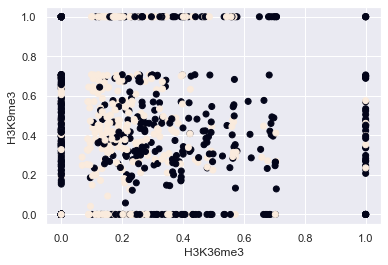

In [30]:
plt.scatter(enrichment_matrix[:, 0], enrichment_matrix[:, 1], c = labels2)
plt.xlabel('H3K36me3')
plt.ylabel('H3K9me3')
plt.show()

In [31]:
enrichment_matrix1 = pd.DataFrame(enrichment_matrix)
#["H3K36me3", "H3K9me3", "H3K4me1", "H3K4me2", "H3K4me3", "H3K27me3", "H4K20me1"]
enrichment_matrix1.columns = ["H3K36me3", "H3K9me3", "H3K4me1", "H3K4me2", "H3K4me3", "H3K27me3", "H4K20me1"]
enrichment_matrix1

,H3K36me3,H3K9me3,H3K4me1,H3K4me2,H3K4me3,H3K27me3,H4K20me1
0,0.085409,0.326920,0.133188,0.122681,0.157722,0.167622,0.705304
1,0.160891,0.351415,0.111609,0.096320,0.139404,0.226065,0.369001
2,0.000000,0.000000,0.172814,0.253319,0.706817,0.275085,0.000000
3,0.000000,0.000000,0.501726,0.312852,0.694064,0.244738,0.000000
4,0.372169,0.000000,0.270819,0.167466,0.241590,0.499037,0.704529
...,...,...,...,...,...,...,...
1095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1096,0.000000,0.000000,0.311403,0.317256,0.570525,1.000000,0.000000
1097,0.000000,0.000000,0.383977,0.523487,0.000000,0.000000,1.000000
1098,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


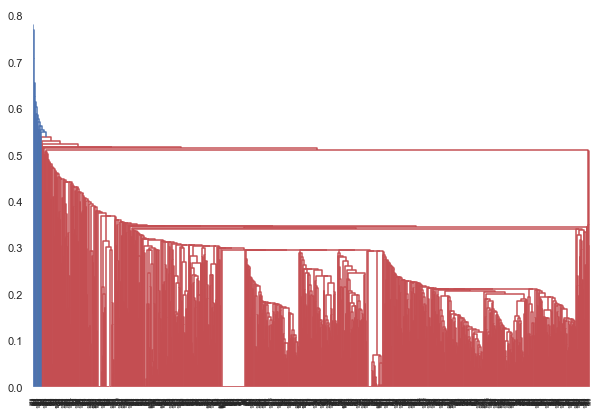

In [32]:
linked = linkage(enrichment_matrix, 'single')

labelList = range(1, 1101)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [33]:
agglomerative_labels = common_TADs["Label"]
agglomerative_color = []
for i in range(len(agglomerative_labels)):
    if agglomerative_labels[i] == 1:
        agglomerative_color.append("r")
    else:
        agglomerative_color.append("g")


,H4K20me1,H3K9me3,H3K27me3,H3K36me3,H3K4me3,H3K4me1,H3K4me2
174,1.0,1.000000,0.706023,0.000000,0.000000,1.000000,0.000000
973,1.0,1.000000,1.000000,0.175534,0.496117,1.000000,0.397276
121,1.0,0.263722,1.000000,0.448897,0.705081,0.000000,1.000000
223,1.0,1.000000,0.314749,0.000000,0.677827,0.494008,1.000000
967,0.0,0.554694,0.412362,0.567136,1.000000,0.523311,1.000000
...,...,...,...,...,...,...,...
734,0.0,0.405204,0.000000,0.620056,0.000000,0.341664,0.325329
289,0.0,0.266890,0.000000,0.497085,0.000000,0.426794,0.611802
306,0.0,0.421800,0.000000,0.466020,0.000000,0.391106,0.545416
348,0.0,0.234898,0.706213,0.479519,0.000000,0.353603,0.477682


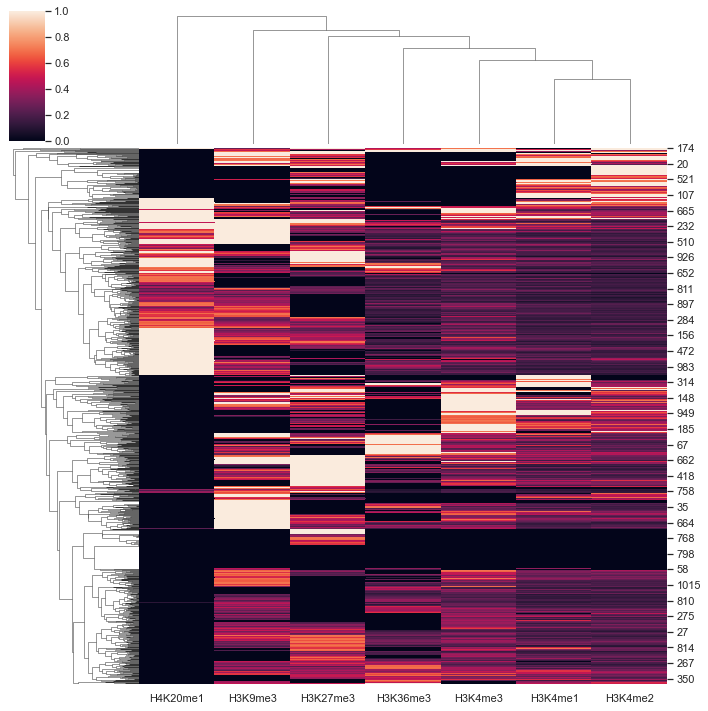

In [34]:
heatmap2 = sns.clustermap(enrichment_matrix1)
#["H3K36me3", "H3K9me3", "H3K4me1", "H3K4me2", "H3K4me3", "H3K27me3", "H4K20me1"]
#     0           1          2          3          4          5            6
heatmap2.data2d

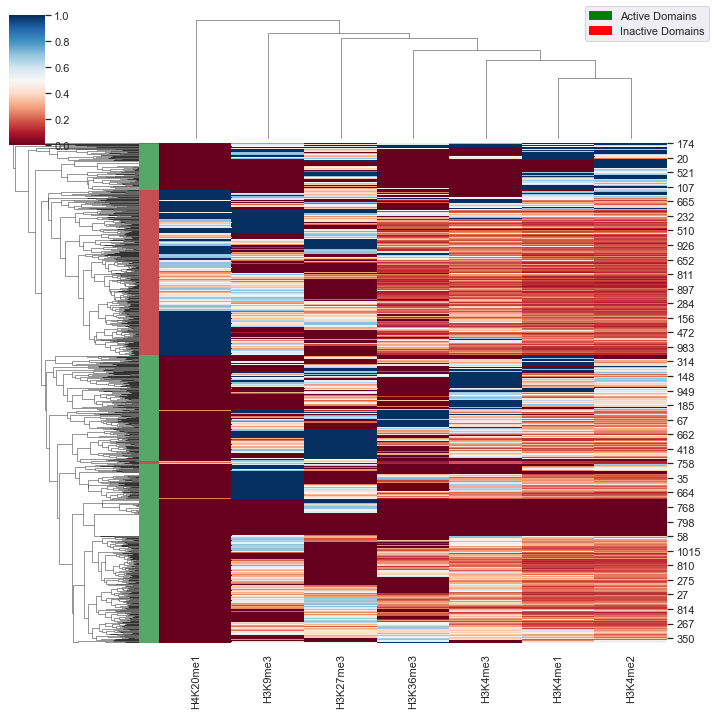

In [70]:
clustermap2d = heatmap2.data2d
cluster_agglomerative_colors = []
for i in clustermap2d.index:
    cluster_agglomerative_colors.append(agglomerative_color[int(i)])
final_clustermap = sns.clustermap(enrichment_matrix1, cmap="RdBu", row_colors = agglomerative_color)
green_patch = mpatches.Patch(color='green', label='Active Domains')
red_patch = mpatches.Patch(color='red', label='Inactive Domains')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.show()

In [37]:
chromosomes = common_TADs["chr1"].unique()
chr1_TAD = common_TADs[common_TADs["chr1"] == "1"]
chr1_TAD_sorted = chr1_TAD.sort_values(by = ["x1", "x2"])
chr1_enrichment_matrix = []
for ind in chr1_TAD_sorted.index:
    chr1_enrichment_matrix.append(enrichment_matrix[ind])
chr1_enrichment_matrix = pd.DataFrame(chr1_enrichment_matrix)
chr1_enrichment_matrix.columns = ["H3K36me3", "H3K9me3", "H3K4me1", "H3K4me2", "H3K4me3", "H3K27me3", "H4K20me1"]
chr1_enrichment_matrix

,H3K36me3,H3K9me3,H3K4me1,H3K4me2,H3K4me3,H3K27me3,H4K20me1
0,0.000000,0.669238,0.346034,0.267189,1.000000,0.274394,0.000000
1,0.225970,0.384614,0.252095,0.192944,0.274704,0.460006,0.000000
2,0.155612,0.642965,0.188800,0.208207,0.356119,1.000000,0.707106
3,1.000000,0.386305,0.183673,0.117339,0.253206,0.356945,1.000000
4,0.000000,0.488668,0.183505,0.200339,0.315417,1.000000,0.000000
...,...,...,...,...,...,...,...
127,0.179587,0.529109,0.230396,0.192469,0.415949,0.262281,0.680203
128,0.000000,0.426442,1.000000,1.000000,0.000000,0.565307,1.000000
129,0.398500,0.706002,0.247457,0.161856,0.210897,0.000000,0.564767
130,0.000000,0.572094,0.468265,0.387915,0.695427,0.320751,0.000000


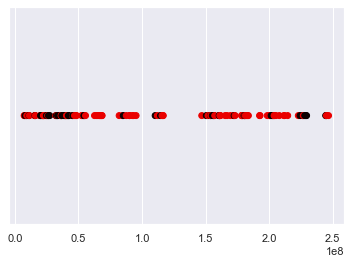

In [39]:
plt.scatter(chr1_TAD_sorted["x1"], np.zeros_like(chr1_TAD_sorted["x1"]), 
            c=chr1_TAD_sorted["Label"], cmap="hot_r", vmin=-2)

plt.yticks([])
plt.show()

In [144]:
GM12878_mnemonics = pd.read_csv("Carter Lab Datasets/chromHMM/E116_15_coreMarks_mnemonics.bed", sep='\t', header=None)
header2 = ["chr", "start", "end", "state"]
GM12878_mnemonics.columns = header2[:len(GM12878_mnemonics.columns)]
GM12878_mnemonics
state_index = []
for st in GM12878_mnemonics["state"]:
    if st == "1_TssA":
        state_index.append(0)
    elif st == "2_TssAFlnk":
        state_index.append(1)
    elif st == "3_TxFlnk":
        state_index.append(2)
    elif st == "4_Tx":
        state_index.append(3)
    elif st == "5_TxWk":
        state_index.append(4)
    elif st == "6_EnhG":
        state_index.append(5)
    elif st == "7_Enh":
        state_index.append(6)
    elif st == "8_ZNF/Rpts":
        state_index.append(7)
    elif st == "9_Het":
        state_index.append(8)
    elif st == "10_TssBiv":
        state_index.append(9)
    elif st == "11_BivFlnk":
        state_index.append(10)
    elif st == "12_EnhBiv":
        state_index.append(11)
    elif st == "13_ReprPC":
        state_index.append(12)
    elif st == "14_ReprPCWk":
        state_index.append(13)
    else:
        state_index.append(14)
    
GM12878_mnemonics["state_index"] = state_index
GM12878_mnemonics

,chr,start,end,state,state_index
0,chr10,0,119600,15_Quies,14
1,chr10,119600,120200,1_TssA,0
2,chr10,120200,140200,15_Quies,14
3,chr10,140200,145200,9_Het,8
4,chr10,145200,149000,15_Quies,14
...,...,...,...,...,...
466764,chrX,155199000,155226800,15_Quies,14
466765,chrX,155226800,155227000,7_Enh,6
466766,chrX,155227000,155227400,2_TssAFlnk,1
466767,chrX,155227400,155228200,7_Enh,6


In [148]:
#common TADs
enrichment_15_states = np.zeros((9274, 15))

for i, row in common_TADs.iterrows():
    if i % 100 == 0:
        print(i)
    #states = {"1_TssA": [], "2_TssAFlnk": [], "3_TxFlnk": [], "4_Tx": [], "5_TxWk": [], "6_EnhG": [], "7_Enh":[], "8_ZNF/Rpts": [], "9_Het": [], "10_TssBiv": [], "11_BivFlnk":[], "12_EnhBiv": [], "13_ReprPC": [], "14_ReprPCWk": [], "15_Quies": []}
    common_chr = GM12878_mnemonics[GM12878_mnemonics["chr"]  == "chr" + str(row["chr1"])]
    TAD_start, TAD_end = row["x1"], row["x2"]
    overlap_chromatin = common_chr[(common_chr["end"] >= TAD_start) & (common_chr["start"] <= TAD_end)]
    overlaps = (overlap_chromatin["end"]-overlap_chromatin["start"]).tolist()
    state_indices = overlap_chromatin["state_index"].tolist()
    overall_indices = overlap_chromatin.index
    min_ind = min(overall_indices)
    max_ind = max(overall_indices)
    if overlap_chromatin.at[min_ind, "start"] < TAD_start:
        overlaps[0] = overlap_chromatin.at[min_ind, "end"] - TAD_start
    
    if overlap_chromatin.at[max_ind, "end"] > TAD_end:
        overlaps[-1] = TAD_end - overlap_chromatin.at[max_ind, "start"]
    for j in range(len(overlaps)):
        enrichment_15_states[i][state_indices[j]] += overlaps[j]
    

0
100
200
300
400
500
600
700
800
900
1000


In [194]:
enrichment_15_states2 = np.zeros((9274, 15))

for i, row in GM12878_TADs.iterrows():
    if i % 100 == 0:
        print(i)
    #states = {"1_TssA": [], "2_TssAFlnk": [], "3_TxFlnk": [], "4_Tx": [], "5_TxWk": [], "6_EnhG": [], "7_Enh":[], "8_ZNF/Rpts": [], "9_Het": [], "10_TssBiv": [], "11_BivFlnk":[], "12_EnhBiv": [], "13_ReprPC": [], "14_ReprPCWk": [], "15_Quies": []}
    common_chr2 = GM12878_mnemonics[GM12878_mnemonics["chr"]  == "chr" + str(row["chr1"])]
    TAD_start2, TAD_end2 = row["x1"], row["x2"]
    overlap_chromatin2 = common_chr2[(common_chr2["end"] >= TAD_start2) & (common_chr2["start"] <= TAD_end2)]
    overlaps2 = (overlap_chromatin2["end"]-overlap_chromatin2["start"]).tolist()
    state_indices2 = overlap_chromatin2["state_index"].tolist()
    overall_indices2 = overlap_chromatin2.index
    min_ind2 = min(overall_indices2)
    max_ind2 = max(overall_indices2)
    if overlap_chromatin2.at[min_ind2, "start"] < TAD_start2:
        overlaps2[0] = overlap_chromatin2.at[min_ind2, "end"] - TAD_start2
    
    if overlap_chromatin2.at[max_ind2, "end"] > TAD_end2:
        overlaps2[-1] = TAD_end2 - overlap_chromatin2.at[max_ind2, "start"]
    for j in range(len(overlaps2)):
        enrichment_15_states2[i][state_indices2[j]] += overlaps2[j]


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200


In [183]:
normalized_enrichment_15_states = np.zeros((1100, 15))
for i, row2 in common_TADs.iterrows():
    ratio = enrichment_15_states[i] / (row2["x2"] - row2["x1"])
    norm2 = np.linalg.norm(ratio)
    normalized_enrichment_15_states[i] = ratio / norm2
normalized_enrichment_15_states

array([[2.97922545e-04, 1.78753527e-03, 0.00000000e+00, ...,
        1.28106694e-02, 8.60698233e-01, 5.08553784e-01],
       [7.07464459e-03, 2.20562449e-02, 0.00000000e+00, ...,
        2.24724005e-02, 5.74294679e-01, 8.04012550e-01],
       [0.00000000e+00, 1.68969346e-02, 0.00000000e+00, ...,
        3.46831815e-02, 9.44449712e-01, 2.94362387e-01],
       ...,
       [2.15090863e-02, 9.05645740e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.92449720e-02, 9.71305056e-01],
       [9.57335730e-02, 3.48122084e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.35767613e-01, 9.79963666e-01],
       [4.60534326e-02, 7.95468382e-02, 3.97734191e-02, ...,
        0.00000000e+00, 3.97734191e-02, 7.66161652e-01]])

In [196]:
normalized_enrichment_15_states2 = np.zeros((9274, 15))
for i, row2 in GM12878_TADs.iterrows():
    ratio2 = enrichment_15_states2[i] / (row2["x2"] - row2["x1"])
    norm3 = np.linalg.norm(ratio2)
    normalized_enrichment_15_states2[i] = ratio2 / norm3
normalized_enrichment_15_states2

array([[6.94062897e-02, 6.98400790e-02, 5.20547173e-03, ...,
        1.37077422e-01, 3.50501763e-01, 7.91231703e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.32302304e-04, 4.74226728e-03, 9.99986094e-01],
       [0.00000000e+00, 4.31587610e-04, 0.00000000e+00, ...,
        2.44566312e-03, 3.40954212e-02, 9.99413043e-01],
       ...,
       [4.52516484e-03, 1.35754945e-01, 7.69278023e-02, ...,
        0.00000000e+00, 9.95536265e-02, 5.11343627e-01],
       [0.00000000e+00, 3.64880890e-03, 0.00000000e+00, ...,
        3.64880890e-03, 7.48005825e-01, 5.98404660e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99898833e-01]])

In [197]:
normalized_enrichment_15_states2.shape

(9274, 15)

In [198]:
kmeans_states = KMeans(n_clusters=5)
kmeans_states.fit(normalized_enrichment_15_states2)

KMeans(n_clusters=5)

In [203]:
kmeans_labels_states = kmeans_states.labels_
kmeans_colors_states = []
for lab in kmeans_labels_states:
    if lab == 0:
        kmeans_colors_states.append("mediumpurple")
    elif lab == 1:
        kmeans_colors_states.append("grey")
    elif lab == 2:
        kmeans_colors_states.append("deepskyblue")
    elif lab == 3:
        kmeans_colors_states.append("orange")
    else:
        kmeans_colors_states.append("red")
print(len(kmeans_colors_states))

9274


In [200]:
hierarchical_states = AgglomerativeClustering(n_clusters = 5).fit(normalized_enrichment_15_states2)

In [204]:
hierarchical_labels_states = hierarchical_states.labels_
hierarchical_colors_states = []
for lab in hierarchical_labels_states:
    if lab == 0:
        hierarchical_colors_states.append("mediumpurple")
    elif lab == 1:
        hierarchical_colors_states.append("grey")
    elif lab == 2:
        hierarchical_colors_states.append("deepskyblue")
    elif lab == 3:
        hierarchical_colors_states.append("orange")
    else:
        hierarchical_colors_states.append("red")
print(len(hierarchical_colors_states))

9274


In [188]:
common_TADs["kmeans_label_states"] = kmeans_labels_states
common_TADs["hierarchical_label_states"] = hierarchical_labels_states
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K4me1,H3K4me2,H3K4me3,H3K27me3,H4K20me1,KMeans_Label,Label,#meqtl,kmeans_label_states,hierarchical_label_states
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.133188,0.122681,0.157722,0.167622,0.705304,1,1,206,4,4
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.111609,0.096320,0.139404,0.226065,0.369001,0,1,219,0,2
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.172814,0.253319,0.706817,0.275085,0.000000,0,0,283,4,4
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.501726,0.312852,0.694064,0.244738,0.000000,0,0,301,0,2
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.270819,0.167466,0.241590,0.499037,0.704529,1,1,38,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,2,1
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,0.311403,0.317256,0.570525,1.000000,0.000000,0,0,0,3,3
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.383977,0.523487,0.000000,0.000000,1.000000,1,1,0,3,3
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,3,3


In [202]:
GM12878_TADs["kmeans_label_states"] = kmeans_labels_states
GM12878_TADs["hierarchical_label_states"] =hierarchical_labels_states
GM12878_TADs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,kmeans_label_states,hierarchical_label_states
0,1,144835000,145835000,1,144835000,145835000,"255,255,0",0.55170,0.350090,0.268600,0.43080,0.53910,4,0
1,1,68985000,70260000,1,68985000,70260000,"255,255,0",0.34374,0.270840,0.295710,0.40022,0.50935,0,0
2,1,49365000,50810000,1,49365000,50810000,"255,255,0",1.05670,0.240080,0.241480,0.49497,0.68434,0,0
3,1,163360000,164895000,1,163360000,164895000,"255,255,0",1.15700,0.219040,0.243360,0.71738,0.60165,0,0
4,1,247800000,248395000,1,247800000,248395000,"255,255,0",0.33524,0.183090,0.273430,0.40819,0.40678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,X,133940000,134045000,X,133940000,134045000,"255,255,0",0.82134,0.017177,0.019672,0.53636,0.55455,0,0
9270,X,24080000,24165000,X,24080000,24165000,"255,255,0",0.92837,0.022191,0.012027,0.65278,0.51389,0,0
9271,X,128865000,128960000,X,128865000,128960000,"255,255,0",0.97871,0.010819,0.021867,0.56667,0.67778,3,3
9272,X,13780000,13880000,X,13780000,13880000,"255,255,0",0.81775,0.014339,0.012749,0.55000,0.63000,2,2


In [212]:
GM12878_percent_label_similar = (len(GM12878_TADs[GM12878_TADs["kmeans_label_states"] == GM12878_TADs["hierarchical_label_states"]]) / (9274))*100
GM12878_percent_label_similar

55.77959887858529

In [153]:
#states = {"1_TssA": [], "2_TssAFlnk": [], "3_TxFlnk": [], "4_Tx": [], "5_TxWk": [], "6_EnhG": [], "7_Enh":[], "8_ZNF/Rpts": [], "9_Het": [], "10_TssBiv": [], "11_BivFlnk":[], "12_EnhBiv": [], "13_ReprPC": [], "14_ReprPCWk": [], "15_Quies": []}
normalized_enrichment_15_states_df = pd.DataFrame(normalized_enrichment_15_states)
normalized_enrichment_15_states_df.columns = ["TssA", "TssAFlnk", "TxFlnk", "Tx", "TxWk", "EnhG", "Enh", "ZNF/Rpts", "Het", "TssBiv", "BivFlnk", "EnhBiv", "ReprPC", "ReprPCWk", "Quies"]
normalized_enrichment_15_states_df

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.000298,0.001788,0.000000,0.000000,0.001192,0.000000,0.014300,0.001490,0.014002,0.000000,0.000000,0.000000,0.012811,0.860698,0.508554
1,0.007075,0.022056,0.000000,0.021224,0.062423,0.002081,0.082399,0.002497,0.107368,0.002497,0.001248,0.004994,0.022472,0.574295,0.804013
2,0.000000,0.016897,0.000000,0.000000,0.070256,0.000000,0.119168,0.000000,0.026679,0.000000,0.000000,0.005336,0.034683,0.944450,0.294362
3,0.001929,0.005788,0.000000,0.054500,0.072346,0.000000,0.025562,0.000482,0.004341,0.001447,0.000000,0.000482,0.009646,0.643393,0.759629
4,0.038102,0.041566,0.003464,0.083132,0.289232,0.005196,0.244202,0.000000,0.055422,0.000000,0.000000,0.000000,0.000000,0.102184,0.912726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.012970,0.011349,0.000000,0.014591,0.695510,0.000000,0.058364,0.003242,0.035667,0.000000,0.000000,0.000000,0.000000,0.126456,0.703616
1096,0.004019,0.001005,0.000000,0.000000,0.000000,0.000000,0.008037,0.000000,0.005023,0.000000,0.000000,0.000000,0.004019,0.271253,0.962444
1097,0.021509,0.009056,0.000000,0.000000,0.217355,0.000000,0.091697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019245,0.971305
1098,0.095734,0.003481,0.000000,0.019147,0.107918,0.000000,0.006962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135768,0.979964


In [205]:
normalized_enrichment_15_states_df2 = pd.DataFrame(normalized_enrichment_15_states2)
normalized_enrichment_15_states_df2.columns = ["TssA", "TssAFlnk", "TxFlnk", "Tx", "TxWk", "EnhG", "Enh", "ZNF/Rpts", "Het", "TssBiv", "BivFlnk", "EnhBiv", "ReprPC", "ReprPCWk", "Quies"]
normalized_enrichment_15_states_df2

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.069406,0.069840,0.005205,0.120593,0.439862,0.013447,0.114087,0.011279,0.034269,0.000434,0.006073,0.005639,0.137077,0.350502,0.791232
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002213,0.000000,0.000000,0.000158,0.000632,0.004742,0.999986
2,0.000000,0.000432,0.000000,0.000000,0.000000,0.000000,0.000288,0.000000,0.002158,0.000000,0.000288,0.000288,0.002446,0.034095,0.999413
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002009,0.000000,0.000937,0.000000,0.000000,0.000000,0.000670,0.024507,0.999697
4,0.001379,0.000345,0.000000,0.000000,0.000000,0.000000,0.001034,0.000000,0.007238,0.000000,0.000000,0.000000,0.001034,0.014476,0.999867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,0.013883,0.000000,0.000000,0.000000,0.025783,0.000000,0.001983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999569
9270,0.002997,0.002997,0.000000,0.221755,0.041954,0.008990,0.020977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.973923
9271,0.004525,0.135755,0.076928,0.235309,0.724026,0.009050,0.352963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099554,0.511344
9272,0.000000,0.003649,0.000000,0.080274,0.262714,0.007298,0.054732,0.000000,0.062030,0.000000,0.000000,0.003649,0.003649,0.748006,0.598405


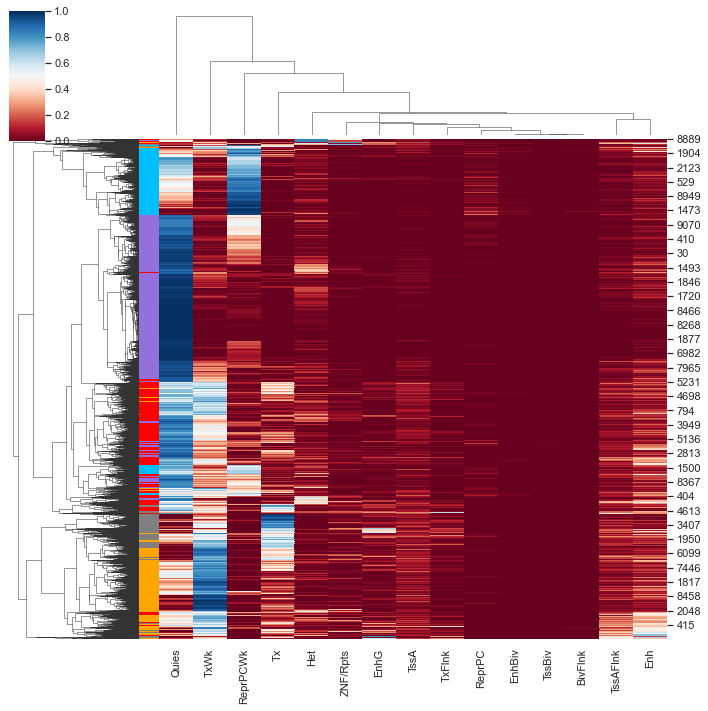

In [206]:
final_clustermap_states = sns.clustermap(normalized_enrichment_15_states_df2, cmap="RdBu", row_colors = kmeans_colors_states)
final_clustermap_states
#red - inactive
#purple - active
#orange - repressed


In [1]:
final_clustermap_states2 = sns.clustermap(normalized_enrichment_15_states_df2, method = "single", cmap="RdBu", row_colors = kmeans_colors_states)
final_clustermap_states2

NameError: name 'sns' is not defined

In [210]:
normalized_enrichment_15_states_df2.to_csv("Carter Lab Datasets/GM12878_enrichments.csv")
normalized_enrichment_15_states_df.to_csv("Carter Lab Datasets/common_TADs_enrichments.csv")

In [208]:
normalized_enrichment_15_states_df

,TssA,TssAFlnk,TxFlnk,Tx,TxWk,EnhG,Enh,ZNF/Rpts,Het,TssBiv,BivFlnk,EnhBiv,ReprPC,ReprPCWk,Quies
0,0.000298,0.001788,0.000000,0.000000,0.001192,0.000000,0.014300,0.001490,0.014002,0.000000,0.000000,0.000000,0.012811,0.860698,0.508554
1,0.007075,0.022056,0.000000,0.021224,0.062423,0.002081,0.082399,0.002497,0.107368,0.002497,0.001248,0.004994,0.022472,0.574295,0.804013
2,0.000000,0.016897,0.000000,0.000000,0.070256,0.000000,0.119168,0.000000,0.026679,0.000000,0.000000,0.005336,0.034683,0.944450,0.294362
3,0.001929,0.005788,0.000000,0.054500,0.072346,0.000000,0.025562,0.000482,0.004341,0.001447,0.000000,0.000482,0.009646,0.643393,0.759629
4,0.038102,0.041566,0.003464,0.083132,0.289232,0.005196,0.244202,0.000000,0.055422,0.000000,0.000000,0.000000,0.000000,0.102184,0.912726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.012970,0.011349,0.000000,0.014591,0.695510,0.000000,0.058364,0.003242,0.035667,0.000000,0.000000,0.000000,0.000000,0.126456,0.703616
1096,0.004019,0.001005,0.000000,0.000000,0.000000,0.000000,0.008037,0.000000,0.005023,0.000000,0.000000,0.000000,0.004019,0.271253,0.962444
1097,0.021509,0.009056,0.000000,0.000000,0.217355,0.000000,0.091697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019245,0.971305
1098,0.095734,0.003481,0.000000,0.019147,0.107918,0.000000,0.006962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135768,0.979964


In [40]:
meqtl_files=os.listdir("Carter Lab Datasets/meQTL Data/")
compiled_meqtl=pd.DataFrame()

for x in meqtl_files:
    if x == "BLCA_tumor.cis_meQTL.txt":
        df = pd.read_csv("Carter Lab Datasets/meQTL Data/"+x, delimiter = "\t")
    else:
        df=pd.read_csv("Carter Lab Datasets/meQTL Data/"+x)
    df["cancer"]=x.split("_")[0]
    compiled_meqtl=compiled_meqtl.append(df)

In [47]:
compiled_meqtl["chr"]=compiled_meqtl["snp_position"].str.split(":").str[0]
compiled_meqtl["bp"]=compiled_meqtl["snp_position"].str.split(":").str[1]

In [48]:
compiled_meqtl["bp"]=pd.to_numeric(compiled_meqtl["bp"])
compiled_meqtl["p-value"]=pd.to_numeric(compiled_meqtl["p-value"],errors="coerce")
compiled_meqt_sig=compiled_meqtl[compiled_meqtl["p-value"]<.00001]
compiled_meqt_sig=compiled_meqt_sig[compiled_meqt_sig["p-value"]>0]

In [49]:
compiled_meqt_sig.shape

(11616299, 35)

In [50]:
num_meqtl=[]
for i,row in common_TADs.iterrows():
    if i % 100 == 0:
        print("{} rows done".format(i))
    meqtl_chr=compiled_meqt_sig[compiled_meqt_sig["chr"]=="chr"+str(row["chr1"])]
    meqtl_sig=meqtl_chr[(meqtl_chr["bp"]>row["x1"])&(meqtl_chr["bp"]<row["x2"])]
    num_meqtl.append(len(meqtl_sig["snp"].unique()))

0 rows done
100 rows done
200 rows done
300 rows done
400 rows done
500 rows done
600 rows done
700 rows done
800 rows done
900 rows done
1000 rows done


In [51]:
common_TADs["#meqtl"]=num_meqtl

In [213]:
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K4me1,H3K4me2,H3K4me3,H3K27me3,H4K20me1,KMeans_Label,Label,#meqtl,kmeans_label_states,hierarchical_label_states
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.133188,0.122681,0.157722,0.167622,0.705304,1,1,206,4,4
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.111609,0.096320,0.139404,0.226065,0.369001,0,1,219,0,2
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.172814,0.253319,0.706817,0.275085,0.000000,0,0,283,4,4
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.501726,0.312852,0.694064,0.244738,0.000000,0,0,301,0,2
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.270819,0.167466,0.241590,0.499037,0.704529,1,1,38,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,2,1
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,0.311403,0.317256,0.570525,1.000000,0.000000,0,0,0,3,3
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.383977,0.523487,0.000000,0.000000,1.000000,1,1,0,3,3
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,3,3


In [53]:
non_zero_H3K36me3 = common_TADs[common_TADs["H3K36me3"] != 0]
non_zero_H3K9me3 = common_TADs[common_TADs["H3K9me3"] != 0]

In [54]:
non_zero_H3K36me3

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K36me3,H3K9me3,H3K4me1,H3K4me2,H3K4me3,H3K27me3,H4K20me1,KMeans_Label,Label,#meqtl
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.82490,0.079690,...,0.085409,0.326920,0.133188,0.122681,0.157722,0.167622,0.705304,1,1,206
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.75130,0.051417,...,0.160891,0.351415,0.111609,0.096320,0.139404,0.226065,0.369001,0,1,219
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.51280,0.032783,...,0.372169,0.000000,0.270819,0.167466,0.241590,0.499037,0.704529,1,1,38
5,5,1,227940000,228150000,1,227940000,228150000,"255,255,0",0.98807,0.042268,...,0.166356,0.403731,0.236497,0.179317,0.239508,0.263775,0.215385,0,1,250
6,6,1,228790000,229365000,1,228790000,229365000,"255,255,0",1.76720,0.083778,...,1.000000,0.568762,0.211816,0.170233,0.515873,0.237769,0.704890,1,1,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1084,9,95430000,95565000,9,95430000,95565000,"255,255,0",1.09980,0.031421,...,0.542735,1.000000,0.274768,0.215775,0.221564,0.452738,1.000000,1,1,175
1087,1087,X,149110000,149895000,X,149110000,149895000,"255,255,0",1.05640,0.232420,...,0.323836,1.000000,0.232474,0.182772,0.250551,0.000000,0.000000,0,0,0
1089,1089,X,2550000,2745000,X,2550000,2745000,"255,255,0",1.54790,0.041271,...,0.248130,0.297358,0.315613,0.257273,0.362276,0.707089,0.000000,0,0,0
1094,1094,X,46675000,46960000,X,46675000,46960000,"255,255,0",1.24220,0.048438,...,1.000000,0.235375,0.149426,0.140400,0.168665,0.702562,1.000000,1,1,0


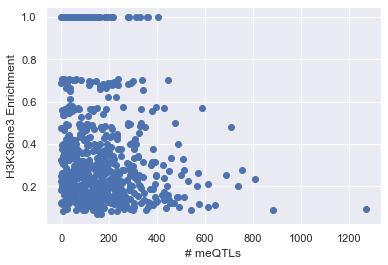

In [55]:
plt.scatter(non_zero_H3K36me3["#meqtl"], non_zero_H3K36me3["H3K36me3"])
plt.xlabel("# meQTLs")
plt.ylabel("H3K36me3 Enrichment")
plt.show()

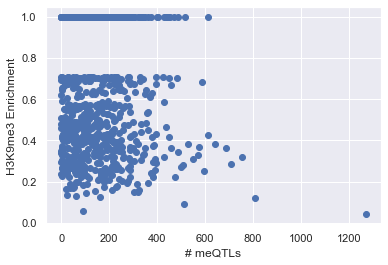

In [56]:
plt.scatter(non_zero_H3K9me3["#meqtl"], non_zero_H3K9me3["H3K9me3"])
plt.xlabel("# meQTLs")
plt.ylabel("H3K9me3 Enrichment")
plt.show()

In [59]:
common_TADs.to_csv("Carter Lab Datasets/common_TADs.csv")


In [ ]:
histone_modifications = ["H3K36me3", "H3K9me3", "H3K4me1", "H3K4me2", "H3K4me3", "H3K27me3", "H4K20me1"]
label_0 = nonzero_histone[(nonzero_histone["Label"] == 0) & (nonzero_histone["#meqtl"] > 0) ]
label_1 = nonzero_histone[(nonzero_histone["Label"] == 1) & (nonzero_histone["#meqtl"] > 0) ]
for i in range(len(histone_modifications)):
    for j in range(i+1, len(histone_modifications)):
        plt.figure()
        plt.scatter(label_0[histone_modifications[i]], label_0[histone_modifications[j]])
        plt.xlabel("{}".format(histone_modifications[i]))
        plt.ylabel("{}".format(histone_modifications[j]))
        m1, b1 = np.polyfit(label_0[histone_modifications[i]], label_0[histone_modifications[j]], 1)
        plt.plot(label_0[histone_modifications[i]], m1*label_0[histone_modifications[i]] + b1)
        slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(label_0[histone_modifications[i]], label_0[histone_modifications[j]])
        plt.title("Label 0 with r-value {}".format(r_value1))
        plt.show()
        
        plt.figure()
        plt.scatter(label_1[histone_modifications[i]], label_1[histone_modifications[j]])
        plt.xlabel("{}".format(histone_modifications[i]))
        plt.ylabel("{}".format(histone_modifications[j]))
        m2, b2 = np.polyfit(label_1[histone_modifications[i]], label_1[histone_modifications[j]], 1)
        plt.plot(label_0[histone_modifications[i]], m1*label_0[histone_modifications[i]] + b1)
        slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(label_1[histone_modifications[i]], label_1[histone_modifications[j]])
        plt.title("Label 1 with r-value {}".format(r_value2))
        plt.show()